# Twitter Analytics with Python

Author: Kang P. Lee <br>
References: 
- Mining the Social Web, 2nd Edition by Matthew A. Russel (http://shop.oreilly.com/product/0636920030195.do)
- Twitter (Python package, https://pypi.python.org/pypi/twitter)
- Twitter Application Management (https://apps.twitter.com/)
- Twitter Developer Documentation (https://developer.twitter.com/en/docs)
- Pandas (Python package, http://pandas.pydata.org/)
- TextBlob (Python package, https://textblob.readthedocs.io/en/dev/)
- Gender-guesser (Python package, https://pypi.python.org/pypi/gender-guesser)
- Natural Language Toolkit (NLTK) (Python package, http://www.nltk.org/)
- Wordcloud (Python package, https://pypi.python.org/pypi/wordcloud)
- Matplotlib (Python package, https://matplotlib.org/)
- NetworkX (Python package, https://networkx.github.io/)

## Prerequisite

Run the following commands on the command line before you run the Jupyter Notenook server.
You may use Terminal app on Mac or Anaconda Prompt on Windows. 
1. pip install gender_guesser ipywidgets matplotlib nltk networkx pandas textblob twitter wordcloud  
2. jupyter nbextension enable --py widgetsnbextension

In [1]:
! python -m nltk.downloader stopwords
! python -m textblob.download_corpora

/opt/anaconda3/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kangplee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to /home/kangplee/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /home/kangplee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/kangplee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/kangplee/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nlt

## Import modules

In [3]:
from collections import Counter
from IPython.display import Image

import twitter
import pandas as pd
from textblob import TextBlob
import gender_guesser.detector as gender
from nltk.corpus import stopwords 
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import networkx as nx
from ipywidgets import widgets, interactive

%matplotlib inline
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.float_format', '{:,.2f}'.format)

## Connect to the Twitter API

In [4]:
###################################################################################
# Fill in the four credentials with your own information.
###################################################################################

CONSUMER_KEY = "MQ65jwTIBLpVgSx9KmJ9zdojN"
CONSUMER_SECRET = "ODXcTwvTT0uoLrMrNPj0NXHnIxBizaiSy4JJamCIlJ6Gbs8nTE"                                                 
ACCESS_TOKEN = "166588006-pBeKxAtcwMdx3mnLVrQelrnBODDIzfTkJktkda5O"
ACCESS_TOKEN_SECRET = "YutpUiwrESCujKOdpop5X3sSx2crkEFNJvWqyG8qhdHI8"

Here's how to get the four credentials from Twitter:
1. Go to https://apps.twitter.com/ and sign in with your Twitter account. 
2. Click the "Create New App" button at the top right of the screen.
3. Fill out the "Application Details". You can fill that out with any information you want, which is never important. 
4. Check the developer agreement at the bottom and click "Create your Twitter application". 
5. Now you see the application name you've just created. Click that.
6. Click the "Keys and Access Tokens" tab.
7. Find the following four values: Consumer Key (API Key), Consumer Secret (API Secret), Access Token, and Access Token Secret. 

In [5]:
###################################################################################
# Establish a connection to the Twitter API.
###################################################################################

auth = twitter.oauth.OAuth(ACCESS_TOKEN, ACCESS_TOKEN_SECRET, CONSUMER_KEY, CONSUMER_SECRET)
twitter_api = twitter.Twitter(auth=auth)

## Search for tweets with a search query

In [6]:
###################################################################################
# Make the first search call to the Twitter API.
###################################################################################

q = "trump"
search_results = twitter_api.search.tweets(q=q, count=100, lang="en", result_type="mixed")

- q: a search query of 500 characters maximum, including operators
- count: the number of tweets to return per page, up to a maximum of 100 
- lang : restricts tweets to the given language 
- result_type: specifies what type of search results you would prefer to receive (mixed | recent | popular)

Note that the search index has a 7-day limit. In other words, you can't search for tweets older than one week.

Refer to https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets.html for details.

In [7]:
###################################################################################
# Check what's in 'search_results' as keys.
###################################################################################

search_results.keys()

dict_keys(['statuses', 'search_metadata'])

In [8]:
###################################################################################
# Check what's in 'search_metadata'.
###################################################################################

search_results["search_metadata"]

{'completed_in': 0.319,
 'max_id': 1057495526655098881,
 'max_id_str': '1057495526655098881',
 'next_results': '?max_id=1056981962626338815&q=trump&lang=en&count=100&include_entities=1&result_type=mixed',
 'query': 'trump',
 'refresh_url': '?since_id=1057495526655098881&q=trump&lang=en&result_type=mixed&include_entities=1',
 'count': 100,
 'since_id': 0,
 'since_id_str': '0'}

In [9]:
###################################################################################
# Check the number of records in 'statuses'.
# A status refers to an individual tweet.
###################################################################################

len(search_results["statuses"])

100

In [10]:
###################################################################################
# Check the first record in 'statuses'.
###################################################################################

search_results["statuses"][0]

{'created_at': 'Mon Oct 29 18:51:52 +0000 2018',
 'id': 1056981962626338816,
 'id_str': '1056981962626338816',
 'text': 'The pathological liar at the White House podium just said Trump was elected by “an overwhelming majority of voters.… https://t.co/lkbvXmfSkJ',
 'truncated': True,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/lkbvXmfSkJ',
    'expanded_url': 'https://twitter.com/i/web/status/1056981962626338816',
    'display_url': 'twitter.com/i/web/status/1…',
    'indices': [117, 140]}]},
 'metadata': {'result_type': 'popular', 'iso_language_code': 'en'},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 158426909,
  'id_str': '158426909',
  'name': "Lawrence O'Donnell",
  'screen_name': 'Lawrence',


Refer to https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object for details.

In [11]:
###################################################################################
# Check the last record in 'statuses'.
###################################################################################

search_results["statuses"][-1]

{'created_at': 'Wed Oct 31 04:52:30 +0000 2018',
 'id': 1057495506576986112,
 'id_str': '1057495506576986112',
 'text': 'RT @Evan_McMullin: As Trump becomes more politically and potentially legally vulnerable, he’ll act increasingly illiberally and illegally t…',
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'Evan_McMullin',
    'name': 'Evan McMullin',
    'id': 1051396218,
    'id_str': '1051396218',
    'indices': [3, 17]}],
  'urls': []},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 430459707,
  'id_str': '430459707',
  'name': 'ffransis ap ffransis',
  'screen_name': 'BranGoch',
  'location': 'Sonoran Desert, AZ',
  'description': '"Red Raven."

In [12]:
###################################################################################
# Check the first 30 tweet texts in 'statuses'.
###################################################################################

for status in search_results["statuses"][:30]:
    print(status["text"])

The pathological liar at the White House podium just said Trump was elected by “an overwhelming majority of voters.… https://t.co/lkbvXmfSkJ
WOWZA. Check out this cease and desist sent by Pharrell Williams to Donald Trump for using “Happy” on “the day of t… https://t.co/bDrFmT8XDk
TRUMP: "I've decided to eat babies."

PEOPLE: "He can't eat babies, that's super illegal."

TRUMP, on TV, eating ba… https://t.co/xTEkEHsPEw
RT @TeaPainUSA: #ThatAwkwardMoment when the GOP accuses Democrats of hatin’ the Constitution the same day Trump promises to nullify the 14t…
RT @kimguilfoyle: Trump Jr. and Guilfoyle release new ad blasting 'mainstream media and liberal mob' https://t.co/ag2XbfILfS
@burr_brady @realDonaldTrFan So if you can't trust the news and I have to be honest I don't trust Trump. How do we… https://t.co/XSScGJ5Qgn
RT @PamKeithFL: Hey South Florida Cubans! Did you see that Trump wants to revoke the citizenship of your kids? I know many of you are activ…
RT @ACTforAmerica: What do you

## Search for more tweets from Twitter

In [13]:
N = 10                     # Number of additional calls to the search API.

#########################################################################
# 'Results' will be used for accumulating all incoming data from Twitter.
# Start by storing the previous data in 'results'.
#########################################################################

results = []
results += search_results["statuses"]

#########################################################################
# Make N more iterative search calls with the same query.
#########################################################################

for _ in range(N):
    try:
        next_results = search_results["search_metadata"]["next_results"]
    except KeyError:
        break
    
    kwargs = dict([kv.split('=') for kv in next_results[1:].split("&")])
    search_results = twitter_api.search.tweets(**kwargs)
    
    print("%d tweets retrieved." %len(search_results["statuses"]))
    
    ##########################################################
    # Add the current search results to the overall results.
    ##########################################################
    
    results += search_results["statuses"]

100 tweets retrieved.
100 tweets retrieved.
100 tweets retrieved.
100 tweets retrieved.
100 tweets retrieved.
100 tweets retrieved.
100 tweets retrieved.
100 tweets retrieved.
100 tweets retrieved.
100 tweets retrieved.


Due to Twitter's API rate policy, OAuth users can only make 180 search queries per 15-minute window. 

Refer to https://dev.twitter.com/rest/public/rate-limits for details. 

In [14]:
#########################################################################
# Check the number of records in 'results'.
#########################################################################

len(results)

1100

## Save the data as a CSV file

It's alwasy a good idea to save the collected data, which is temporarily in the memory, as a file for secured and easier access to the data. 

In [15]:
###################################################################################
# Simple function to remove special characters in text.
###################################################################################

def cleanse_text(text):
    text = text.replace("\n", "")
    text = text.replace("\r", "")
    text = text.replace("\t", "")
    text = text.replace("\"", "")
    
    return text

In [16]:
###################################################################################
# Write the data to a CSV file.
###################################################################################

with open(file="search_data.csv", mode="w", encoding="utf8") as fw:
    
    ###########################################################################################
    # Write the column names on the first row.
    # A tab (\t) acts as a seperator between columns and a new line (\n) as the end of a line. 
    ###########################################################################################
    
    fw.write("id\t" +
             "created_at\t" +
             "text\t" +
             "is_retweet\t" +
             "retweet_created_at\t" +
             "retweet_count\t" +
             "user_id\t" +
             "user_name\t" +
             "user_screen_name\t" + 
             "user_created_at\t" +
             "user_followers_count\t" +
             "user_statuses_count\t" +
             "user_location\t" +
             "user_desc\n")

    ###########################################################################################
    # Write the actual data starting from the second row by iterating over the 'results'.
    # A tab (\t) acts as a seperator between columns and a new line (\n) as the end of a line. 
    # Mare sure the order of column names matches the order in which the column values are written.
    ###########################################################################################
    
    for status in results:
        fw.write(status["id_str"] + "\t")
        fw.write(status["created_at"] + "\t")
        fw.write(cleanse_text(status["text"]) + "\t")
        
        if "retweeted_status" in status:
            fw.write("1\t")
            fw.write(status["retweeted_status"]["created_at"] + "\t")
        else:
            fw.write("0\t")
            fw.write("\t")
        
        fw.write(str(status["retweet_count"]) + "\t")
        fw.write(status["user"]["id_str"] + "\t")
        fw.write(status["user"]["name"] + "\t")
        fw.write(status["user"]["screen_name"] + "\t")
        fw.write(status["user"]["created_at"] + "\t")
        fw.write(str(status["user"]["followers_count"]) + "\t")
        fw.write(str(status["user"]["statuses_count"]) + "\t")
        fw.write(cleanse_text(status["user"]["location"]) + "\t")
        fw.write(cleanse_text(status["user"]["description"]) + "\t")
        fw.write("\n")

## Load the CSV file as a Pandas dataframe

It's also a very good idea to start a social media analysis task by loading the dataset into a Pandas dataframe as it provides a wide range of data manipulation functionalities.

In [17]:
df = pd.read_csv("search_data.csv", sep="\t", header=0, parse_dates=[1, 11], index_col=False)

If you don't see any errors, that means your dataset has been successfully loaded into a Pandas dataframe. If you see any errors, that means there have been some problems in parsing and loading the dataset.

## Get familiar with the dataset

In [17]:
df.shape

(1100, 14)

The dataframe <i>df</i> is a 1100 x 14 table, which means there are 1100 rows, or records, and 14 columns, or fields.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
id                      1100 non-null int64
created_at              1100 non-null datetime64[ns]
text                    1100 non-null object
is_retweet              1100 non-null int64
retweet_created_at      897 non-null object
retweet_count           1100 non-null int64
user_id                 1100 non-null int64
user_name               1100 non-null object
user_screen_name        1100 non-null object
user_created_at         1100 non-null object
user_followers_count    1100 non-null int64
user_statuses_count     1100 non-null object
user_location           762 non-null object
user_desc               888 non-null object
dtypes: datetime64[ns](1), int64(5), object(8)
memory usage: 120.4+ KB


In [19]:
df.columns

Index(['id', 'created_at', 'text', 'is_retweet', 'retweet_created_at',
       'retweet_count', 'user_id', 'user_name', 'user_screen_name',
       'user_created_at', 'user_followers_count', 'user_statuses_count',
       'user_location', 'user_desc'],
      dtype='object')

In [20]:
df.head()

,id,created_at,text,is_retweet,retweet_created_at,retweet_count,user_id,user_name,user_screen_name,user_created_at,user_followers_count,user_statuses_count,user_location,user_desc
0,1009764707346075649,2018-06-21 11:47:21,TIME’s new cover: A reckoning after Trump's border separation policy: What kind of country are we?… https://t.co/iRrT5dtbp8,0,NaN,47157,14293310,TIME,TIME,Thu Apr 03 13:54:30 +0000 2008,15654569,287905,NaN,Breaking news and current events from around the globe. Hosted by TIME staff.
1,1009897068503207936,2018-06-21 20:33:18,"Here’s another zero tolerance program for the Trump Administration: EVERY child, EVERY baby has to be reunited with… https://t.co/e19PXYe4MH",0,NaN,17914,3333055535,Eric Holder,EricHolder,Thu Jun 18 17:40:27 +0000 2015,380582,396,NaN,AG 82
2,1009605359600668672,2018-06-21 01:14:09,"First, Trump created a crisis by repealing DACA, and threatened to deport DREAMErs if he didn’t get his wall.Next… https://t.co/45qfxDDvWe",0,NaN,32136,29501253,Adam Schiff,RepAdamSchiff,Tue Apr 07 17:54:35 +0000 2009,970597,4601,"Burbank, CA",Representing California's 28th Congressional District and Ranking Member of the House Intelligence Committee.
3,1010074570651525121,2018-06-22 08:18:38,@parscale @KimKardashian Perhaps Kardashian would like to see USA transformed into a brutal dictatorship where peop… https://t.co/a0KNlaj2mq,0,NaN,0,966683797382205440,Jarin,Jarin50926789,Thu Feb 22 14:39:12 +0000 2018,5,2424,NaN,NaN
4,1010074570299232258,2018-06-22 08:18:38,"RT @EdKrassen: President Trump, who says he won't show up in court for a Robert Mueller subpoena, claims that we must detain immigrants ind…",1,Fri Jun 22 00:11:00 +0000 2018,3725,86792097,SharonBohn 🌊,BookishBeachBum,Sun Nov 01 20:11:03 +0000 2009,1698,22415,Beyond your peripheral vision,"Wanderer, Christian, wino, future ex-pat living blue in a red state imagining Sisyphus as happy. Oxford comma or GTFO#amwriting #Resistance #ePluribusUnum"


In [21]:
df.tail()

,id,created_at,text,is_retweet,retweet_created_at,retweet_count,user_id,user_name,user_screen_name,user_created_at,user_followers_count,user_statuses_count,user_location,user_desc
1095,1009605285558800384,2018-06-21 01:13:52,"RT @WiredSources: Massive crowd awaiting President Trump remarks at a rally in Duluth, Minnesotahttps://t.co/a9wbldnMzm",1,Wed Jun 20 23:20:31 +0000 2018,3397,326825780,chuck21,Chuck3960,Thu Jun 30 15:10:29 +0000 2011,656,36965,NaN,"Any people that would give up liberty for a little temporary safety deserves neither liberty nor safety. Benjamin Franklin, Against any form of Liberalism"
1096,1009605285550252032,2018-06-21 01:13:52,RT @Salon: It’s long past time to compare Donald Trump and the Nazis https://t.co/A6csHfSQ1K,1,Wed Jun 20 23:13:23 +0000 2018,104,465193761,Pete G,PGeorgatos,Mon Jan 16 02:31:46 +0000 2012,95,18285,NaN,NaN
1097,1009605285546250241,2018-06-21 01:13:52,"RT @ECMcLaughlin: In case you thought we'd won today, I give you the actual language.The Secretary of Homeland Security (Secretary), sha…",1,Thu Jun 21 00:57:43 +0000 2018,69,476388891,“Mentally Unfit” Resister,mh451,Sat Jan 28 02:44:45 +0000 2012,467,8074,Earth,#FBR. Concerned citizen. #Resist #Trump's #taxscam bankrupting U.S. What about Hillary (a retort to #MAGA). R/Ts ≠ endorsement(s). No Lists.
1098,1009605285453836288,2018-06-21 01:13:52,"RT @greggutfeld: Trump made a point as an aside: he's an elitist in wealth and property, yet embraced by working class. that unravels the D…",1,Thu Jun 21 00:38:14 +0000 2018,4912,717746159091982337,Mary,MaryEllen85635,Wed Apr 06 16:09:54 +0000 2016,5954,23604,"Arizona, USA",#MAGA 🇺🇸Donald J Trump 👉#BestPresidentEver Thank God 👼Hillary isn't anyone's presidenthttps://t.co/sSPqK48kCk
1099,1009605285407744000,2018-06-21 01:13:52,RT @MrFilmkritik: Trump just signed an Executive Order he didn't need to sign to end a policy that he created and the White House said didn…,1,Wed Jun 20 19:33:12 +0000 2018,24852,42084835,Jacquelyn Reynolds,buoyantbabe,Sat May 23 19:42:32 +0000 2009,65,3535,"Alberta, Canada",NaN


In [22]:
df.created_at

0      2018-06-21 11:47:21
1      2018-06-21 20:33:18
2      2018-06-21 01:14:09
3      2018-06-22 08:18:38
4      2018-06-22 08:18:38
5      2018-06-22 08:18:38
6      2018-06-22 08:18:38
7      2018-06-22 08:18:38
8      2018-06-22 08:18:38
9      2018-06-22 08:18:38
10     2018-06-22 08:18:38
11     2018-06-22 08:18:38
12     2018-06-22 08:18:38
13     2018-06-22 08:18:38
14     2018-06-22 08:18:37
15     2018-06-22 08:18:37
16     2018-06-22 08:18:37
17     2018-06-22 08:18:37
18     2018-06-22 08:18:37
19     2018-06-22 08:18:37
20     2018-06-22 08:18:37
21     2018-06-22 08:18:37
22     2018-06-22 08:18:37
23     2018-06-22 08:18:37
24     2018-06-22 08:18:37
25     2018-06-22 08:18:37
26     2018-06-22 08:18:36
27     2018-06-22 08:18:36
28     2018-06-22 08:18:36
29     2018-06-22 08:18:36
               ...        
1070   2018-06-21 01:13:52
1071   2018-06-21 01:13:52
1072   2018-06-21 01:13:52
1073   2018-06-21 01:13:52
1074   2018-06-21 01:13:52
1075   2018-06-21 01:13:52
1

## Enrich the columns with tweet sentiment

Let's add two new columns named <i>polarity</i> and <i>subjectivity</i> that indicate how positive/negative and subjective the tweet text is.

In [23]:
text = "It's just awesome!"
tb = TextBlob(text)

In [24]:
tb.sentiment     # polarity between -1 (negative) and 1 (positive) 
                 # subjectivity between 0 (objective) and 1 (subjective)

Sentiment(polarity=1.0, subjectivity=1.0)

In [25]:
tb.sentiment.polarity

1.0

In [26]:
###################################################################################
# Create a new column 'polairty' in 'df' and fill the column with the polarity of 
# the tweet text by iterating over all the texts under 'df.text' one by one.
###################################################################################

df["polarity"] = df.text.apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [27]:
df["subjectivity"] = df.text.apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

In [28]:
df.columns

Index(['id', 'created_at', 'text', 'is_retweet', 'retweet_created_at',
       'retweet_count', 'user_id', 'user_name', 'user_screen_name',
       'user_created_at', 'user_followers_count', 'user_statuses_count',
       'user_location', 'user_desc', 'polarity', 'subjectivity'],
      dtype='object')

In [29]:
df[["text", "polarity", "subjectivity"]].head(10)

,text,polarity,subjectivity
0,TIME’s new cover: A reckoning after Trump's border separation policy: What kind of country are we?… https://t.co/iRrT5dtbp8,0.37,0.68
1,"Here’s another zero tolerance program for the Trump Administration: EVERY child, EVERY baby has to be reunited with… https://t.co/e19PXYe4MH",0.00,0.00
2,"First, Trump created a crisis by repealing DACA, and threatened to deport DREAMErs if he didn’t get his wall.Next… https://t.co/45qfxDDvWe",0.25,0.33
3,@parscale @KimKardashian Perhaps Kardashian would like to see USA transformed into a brutal dictatorship where peop… https://t.co/a0KNlaj2mq,-0.88,1.00
4,"RT @EdKrassen: President Trump, who says he won't show up in court for a Robert Mueller subpoena, claims that we must detain immigrants ind…",0.00,0.00
5,"RT @EricHolder: Here’s another zero tolerance program for the Trump Administration: EVERY child, EVERY baby has to be reunited with his or…",0.00,0.00
6,RT @Education4Libs: First Lady Melania Trump took the time to visit a child detention center today in Texas.Strange.I don’t recall Mich…,0.07,0.22
7,"RT @1Romans58: This POS is getting on my last nerve. That fake smug smile needs to be removed. After Helping Plot &amp; Fund Trump Dossier,…",-0.07,0.39
8,RT @TomArnold: If you are triggered by the abuse of children the full facts of how The Trump Administration has been housing &amp; abusing chil…,0.35,0.55
9,North Korea 'total denuclearisation' started; officials see no new moves - Trump - Reuters: Reuters North Korea 'to… https://t.co/F8zxPSgZzX,-0.03,0.60


In [30]:
df[(df.polarity > 0.7) | (df.polarity < -0.7)][["text", "polarity"]].head(10)

,text,polarity
3,@parscale @KimKardashian Perhaps Kardashian would like to see USA transformed into a brutal dictatorship where peop… https://t.co/a0KNlaj2mq,-0.88
83,RT @NikitaKitty: Trump backs plan to end family separations but shirks responsibility https://t.co/1z4QQbEYRM This disgusting lump of inhum…,-1.00
84,RT @GermanyKent: Rosalynn Carter: “disgraceful and a shame to our country” Laura Bush: zero-tolerance policy is cruel and immoralHill…,-1.00
106,RT @timothywookey: Madonna says #trump is disgusting &amp; needs to reunite migrant children with their parents immediately. Now he has caved i…,-1.00
133,"RT @MrFilmkritik: While you weren't paying attention, Trump rescinded an Obama policy that was meant to protect the Great Lakes and the oce…",0.80
148,"@RobertBakerUSA @juanwilliams @TheJuanWilliams you are a demented, disgusting, Democrat who's defending peter fonda… https://t.co/V0WdN954SF",-1.00
199,"RT @RepMaxineWaters: Remember when I said Trump &amp; his allies are scumbags? Trump is an immoral, indecent, &amp; inhumane thug. He loves Putin,…",-0.90
200,Goldman = Cruel https://t.co/3TUm6MTjGP,-1.00
229,"RT @RepMaxineWaters: Remember when I said Trump &amp; his allies are scumbags? Trump is an immoral, indecent, &amp; inhumane thug. He loves Putin,…",-0.90
238,RT @Lrihendry: I still feel sick about Peter Fonda’s tweet about Baron Trump. It was horrible. 😢,-0.86


## Enrich the columns with part-of-speech (PoS) tags

Let's add a new column named <i>tags</i> that contains the part-of-speech tags of the tweet text.

In [31]:
text = "It's just awesome!"
tb = TextBlob(text)

In [32]:
tb.tags

[('It', 'PRP'), ("'s", 'VBZ'), ('just', 'RB'), ('awesome', 'JJ')]

Refer to https://cs.nyu.edu/grishman/jet/guide/PennPOS.html for details on the part-of-speech tags.

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/daesikkim/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/daesikkim/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [23]:
###################################################################################
# Create a new column 'tags' in 'df' and fill the column with the part-of-the-speech
# tags of the tweet text by iterating over all the texts under 'df.text' one by one.
###################################################################################

df["tags"] = df.text.apply(lambda x: TextBlob(x).tags)

In [24]:
df.columns

Index(['id', 'created_at', 'text', 'is_retweet', 'retweet_created_at',
       'retweet_count', 'user_id', 'user_name', 'user_screen_name',
       'user_created_at', 'user_followers_count', 'user_statuses_count',
       'user_location', 'user_desc', 'tags'],
      dtype='object')

In [25]:
df[["text", "tags"]].head(10)

,text,tags
0,The pathological liar at the White House podium just said Trump was elected by “an overwhelming majority of voters.… https://t.co/lkbvXmfSkJ,"[(The, DT), (pathological, JJ), (liar, NN), (at, IN), (the, DT), (White, NNP), (House, NNP), (podium, NN), (just, RB), (said, VBD), (Trump, NNP), (was, VBD), (elected, VBN), (by, IN), (“, VBG), (a..."
1,WOWZA. Check out this cease and desist sent by Pharrell Williams to Donald Trump for using “Happy” on “the day of t… https://t.co/bDrFmT8XDk,"[(WOWZA, NNP), (Check, VB), (out, RP), (this, DT), (cease, NN), (and, CC), (desist, NN), (sent, VBN), (by, IN), (Pharrell, NNP), (Williams, NNP), (to, TO), (Donald, NNP), (Trump, NNP), (for, IN), ..."
2,"TRUMP: I've decided to eat babies.PEOPLE: He can't eat babies, that's super illegal.TRUMP, on TV, eating ba… https://t.co/xTEkEHsPEw","[(TRUMP, NN), (I, PRP), ('ve, VBP), (decided, VBN), (to, TO), (eat, VB), (babies.PEOPLE, NN), (He, PRP), (ca, MD), (n't, RB), (eat, VB), (babies, NNS), (that, DT), ('s, VBZ), (super, JJR), (illega..."
3,RT @TeaPainUSA: #ThatAwkwardMoment when the GOP accuses Democrats of hatin’ the Constitution the same day Trump promises to nullify the 14t…,"[(RT, NNP), (@, NNP), (TeaPainUSA, NNP), (ThatAwkwardMoment, NN), (when, WRB), (the, DT), (GOP, NNP), (accuses, VBZ), (Democrats, NNPS), (of, IN), (hatin, NN), (’, IN), (the, DT), (Constitution, N..."
4,RT @kimguilfoyle: Trump Jr. and Guilfoyle release new ad blasting 'mainstream media and liberal mob' https://t.co/ag2XbfILfS,"[(RT, NNP), (@, NNP), (kimguilfoyle, NN), (Trump, NNP), (Jr., NNP), (and, CC), (Guilfoyle, NNP), (release, VB), (new, JJ), (ad, NN), (blasting, NN), ('mainstream, POS), (media, NNS), (and, CC), (l..."
5,@burr_brady @realDonaldTrFan So if you can't trust the news and I have to be honest I don't trust Trump. How do we… https://t.co/XSScGJ5Qgn,"[(@, NNS), (burr_brady, JJ), (@, NNP), (realDonaldTrFan, NN), (So, RB), (if, IN), (you, PRP), (ca, MD), (n't, RB), (trust, VB), (the, DT), (news, NN), (and, CC), (I, PRP), (have, VBP), (to, TO), (..."
6,RT @PamKeithFL: Hey South Florida Cubans! Did you see that Trump wants to revoke the citizenship of your kids? I know many of you are activ…,"[(RT, NNP), (@, NNP), (PamKeithFL, NNP), (Hey, NNP), (South, NNP), (Florida, NNP), (Cubans, NNPS), (Did, NNP), (you, PRP), (see, VBP), (that, IN), (Trump, NNP), (wants, VBZ), (to, TO), (revoke, VB..."
7,RT @ACTforAmerica: What do you think about the possibility of President Trump ending birthright citizenship?,"[(RT, NNP), (@, NNP), (ACTforAmerica, NNP), (What, WP), (do, VBP), (you, PRP), (think, VB), (about, IN), (the, DT), (possibility, NN), (of, IN), (President, NNP), (Trump, NNP), (ending, VBG), (bir..."
8,"LOL I got news for you son, that base left for Trump long ago. https://t.co/cYu83jUjp4","[(LOL, NNP), (I, PRP), (got, VBD), (news, NN), (for, IN), (you, PRP), (son, VBP), (that, IN), (base, NN), (left, VBD), (for, IN), (Trump, NNP), (long, RB), (ago, RB), (https, NN), (//t.co/cYu83jUj..."
9,@Rosie And fuck trump!,"[(@, JJ), (Rosie, NNP), (And, CC), (fuck, JJ), (trump, NN)]"


## Enrich the columns with user gender

Let's add a new column named <i>user_gender</i> that indicates the gender of the Twitter user.

In [36]:
d = gender.Detector(case_sensitive=False)

In [37]:
d.get_gender("Bob"), d.get_gender("Sally"), d.get_gender("Pauley"), d.get_gender("Jamie"), d.get_gender("Iowa")

('male', 'female', 'andy', 'mostly_female', 'unknown')

The gender-guesser returns six types of gender: 
- female
- male
- mostly_female
- mostly_male
- unknown (name not found)
- andy (androgynous)

Refer to https://pypi.python.org/pypi/gender-guesser for details on gender-guesser.

In [38]:
def get_gender(name):
    first_name = name.split()[0]            # Get the first name.
    user_gender = d.get_gender(first_name)
    
    ######################################################################
    # For simplicity, treat most_female as female and most_male as male.
    ######################################################################
    
    if user_gender == "mostly_female":
        user_gender = "female"
    elif user_gender == "mostly_male":
        user_gender = "male"
    
    return user_gender

df["user_gender"] = df.user_name.apply(lambda x: get_gender(x))

In [39]:
df.columns

Index(['id', 'created_at', 'text', 'is_retweet', 'retweet_created_at',
       'retweet_count', 'user_id', 'user_name', 'user_screen_name',
       'user_created_at', 'user_followers_count', 'user_statuses_count',
       'user_location', 'user_desc', 'polarity', 'subjectivity', 'tags',
       'user_gender'],
      dtype='object')

In [40]:
df[["user_name", "user_gender"]].head(10)

,user_name,user_gender
0,TIME,unknown
1,Eric Holder,male
2,Adam Schiff,male
3,Jarin,unknown
4,SharonBohn 🌊,unknown
5,Idella Sherrod,female
6,Bill Feltham,male
7,Deplorable Lessa,unknown
8,kaz #KeepFamiliesTogether,unknown
9,Yasmin Mitri,female


## Statistical overview of the dataset

In [41]:
df.describe()

,id,is_retweet,retweet_count,user_id,user_followers_count,polarity,subjectivity
count,"1,100.00","1,100.00","1,100.00","1,100.00","1,100.00","1,100.00","1,100.00"
mean,"1,009,647,110,571,188,224.00",0.82,"3,944.12","259,617,013,782,013,056.00","19,248.72",0.00,0.35
std,"133,364,349,022,453.36",0.39,"9,578.54","397,001,966,180,938,112.00","473,614.07",0.30,0.34
min,"1,009,605,285,407,744,000.00",0.00,0.00,"5,539,902.00",0.00,-1.00,0.00
25%,"1,009,605,306,592,206,848.00",1.00,10.00,"245,168,971.50",181.50,-0.05,0.00
50%,"1,009,605,325,834,612,736.00",1.00,398.00,"1,498,213,514.00",615.50,0.00,0.30
75%,"1,009,605,347,537,907,712.00",1.00,"3,224.00","770,490,059,391,857,664.00","2,021.25",0.10,0.60
max,"1,010,074,570,651,525,120.00",1.00,"69,093.00","1,010,072,265,222,860,800.00","15,654,569.00",1.00,1.00


## Popular keywords

In [42]:
###################################################################################
# The 'counter' object will have all the word count information. 
###################################################################################

counter = Counter()

for tags in df.tags:
    
    ###################################################################
    # Use a set to remove duplicate words.
    # This enables us to count every term in a tweet as just 1 
    # even though they appear multiple times in the same tweet. 
    ###################################################################
    
    word_set = set()
    
    for item in tags:
        word = item[0].lower()
        word_set.add(word)
            
    counter.update(word_set)

In [43]:
###################################################################################
# Check the top-k popular words in 'counter'. 
###################################################################################

counter.most_common(30)

[('@', 1016),
 ('rt', 898),
 ('trump', 830),
 ('the', 525),
 ('to', 441),
 ('a', 352),
 ('and', 301),
 ('is', 278),
 ('https', 271),
 ('of', 259),
 ('in', 220),
 ('’', 208),
 ("'s", 193),
 ('for', 188),
 ('that', 159),
 ('it', 151),
 ('this', 142),
 ('on', 139),
 ('i', 137),
 ('he', 133),
 ('s', 130),
 ('are', 121),
 ('you', 120),
 ('president', 107),
 ('has', 106),
 ('we', 105),
 ('from', 104),
 ('his', 101),
 ('with', 98),
 ('children', 97)]

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daesikkim/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
###################################################################################
# Use a list of English stopwords provided by NLTK. 
###################################################################################

global_stopwords = stopwords.words("english")
global_stopwords[:30]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself']

In [45]:
counter = Counter()

for tags in df.tags:
    word_set = set()
    
    for item in tags:
        word = item[0].lower()
        
        ###################################
        # Check if the word is a stopword.
        ###################################
        if word in global_stopwords:
            continue
        else:
            word_set.add(word)
            
    counter.update(word_set)
    
counter.most_common(30)

[('@', 1016),
 ('rt', 898),
 ('trump', 830),
 ('https', 271),
 ('’', 208),
 ("'s", 193),
 ('president', 107),
 ('children', 97),
 ("n't", 95),
 ('order', 95),
 ('executive', 87),
 ('policy', 85),
 ('families', 57),
 ('rally', 55),
 ('administration', 54),
 ('family', 54),
 ('…', 51),
 ('“', 51),
 ('one', 51),
 ('people', 50),
 ('parents', 50),
 ('said', 48),
 ('separated', 47),
 ('says', 44),
 ('going', 44),
 ('donald', 44),
 ('realdonaldtrump', 41),
 ('duluth', 39),
 ('&', 38),
 ('”', 38)]

In [33]:
local_stopwords = ["@", "&", "‘", "’", "“", "”", "…", "'", "'s", "amp", "https", "donald", "n't", "president", "rt", "trump"]

counter = Counter()
for tags in df.tags:
    word_set = set()
    
    for item in tags:
        word = item[0].lower()
        
        ##########################################################
        # Check if the word is either a global or local stopword.
        ##########################################################
        
        if word in (global_stopwords + local_stopwords):
            continue
        else:
            word_set.add(word)
            
    counter.update(word_set)
    
counter.most_common(30)

[('people', 118),
 ('sanders', 98),
 ('media', 88),
 ('sarah', 76),
 ('cnn', 63),
 ('presssec', 58),
 ('pittsburgh', 57),
 ('press', 52),
 ('jewish', 49),
 ('realdonaldtrump', 45),
 ('attacks', 44),
 ('synagogue', 43),
 ('white', 42),
 ('one', 42),
 ('like', 38),
 ('obama', 38),
 ('says', 35),
 ('t…', 34),
 ('blame', 34),
 ('said', 33),
 ('%', 32),
 ('welcome', 32),
 ('breaking', 31),
 ('enemy', 31),
 ('time', 31),
 ('elected', 30),
 ('majority', 30),
 ('called', 30),
 ('man', 30),
 ('us', 30)]

## Visualize a word cloud

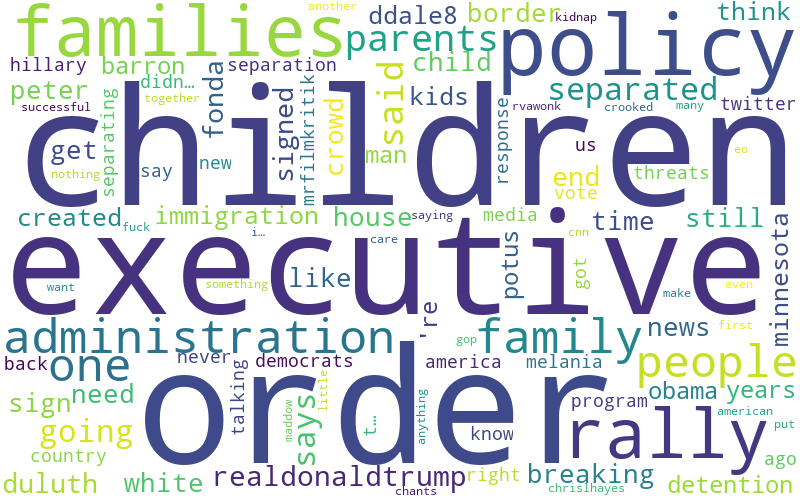

In [47]:
wc = WordCloud(background_color="white", max_words=100, width=800, height=500)
wc.generate_from_frequencies(counter)
wc.to_file("wordcloud.png")

Image(filename="wordcloud.png")

## Popular Adjectives 

In [48]:
counter = Counter()
for tags in df.tags:
    word_set = set()
    
    for item in tags:
        word = item[0].lower()
        tag = item[1]
        
        if word in (global_stopwords + local_stopwords):
            continue
        
        ##########################################################
        # Check if the tag is the adjective.
        ##########################################################
        
        if tag in ["JJ", "JJR", "JJS"]:
            word_set.add(word)
            
    counter.update(word_set)
    
counter.most_common(30)

[('many', 17),
 ('little', 16),
 ('successful', 16),
 ('immigrant', 14),
 ('american', 14),
 ('alternative', 13),
 ('last', 12),
 ('twelve-year-old', 12),
 ('pro-active', 12),
 ('vigorous', 12),
 ('right', 11),
 ('executive', 11),
 ('wrong', 11),
 ('unexpected', 11),
 ('guilty', 11),
 ('good', 10),
 ('old', 10),
 ('human', 10),
 ('illegal', 10),
 ('massive', 10),
 ('na', 9),
 ('anti-trump', 8),
 ('moral', 8),
 ('new', 7),
 ('crazy', 7),
 ('military', 7),
 ('better', 7),
 ('sick', 7),
 ('bad', 7),
 ('entire', 7)]

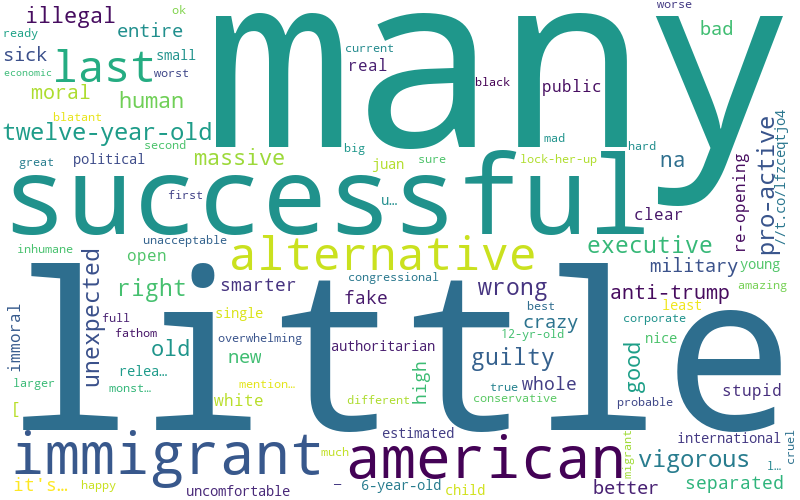

In [49]:
wc = WordCloud(background_color="white", max_words=100, width=800, height=500)
wc.generate_from_frequencies(counter)
wc.to_file("wordcloud_adj.png")

Image(filename="wordcloud_adj.png")

## Popular retweets

In [50]:
df[["text", "retweet_count"]].head(10)

,text,retweet_count
0,TIME’s new cover: A reckoning after Trump's border separation policy: What kind of country are we?… https://t.co/iRrT5dtbp8,47157
1,"Here’s another zero tolerance program for the Trump Administration: EVERY child, EVERY baby has to be reunited with… https://t.co/e19PXYe4MH",17914
2,"First, Trump created a crisis by repealing DACA, and threatened to deport DREAMErs if he didn’t get his wall.Next… https://t.co/45qfxDDvWe",32136
3,@parscale @KimKardashian Perhaps Kardashian would like to see USA transformed into a brutal dictatorship where peop… https://t.co/a0KNlaj2mq,0
4,"RT @EdKrassen: President Trump, who says he won't show up in court for a Robert Mueller subpoena, claims that we must detain immigrants ind…",3725
5,"RT @EricHolder: Here’s another zero tolerance program for the Trump Administration: EVERY child, EVERY baby has to be reunited with his or…",17914
6,RT @Education4Libs: First Lady Melania Trump took the time to visit a child detention center today in Texas.Strange.I don’t recall Mich…,7379
7,"RT @1Romans58: This POS is getting on my last nerve. That fake smug smile needs to be removed. After Helping Plot &amp; Fund Trump Dossier,…",847
8,RT @TomArnold: If you are triggered by the abuse of children the full facts of how The Trump Administration has been housing &amp; abusing chil…,379
9,North Korea 'total denuclearisation' started; officials see no new moves - Trump - Reuters: Reuters North Korea 'to… https://t.co/F8zxPSgZzX,0


In [51]:
df_sub = df[["text", "retweet_count"]]

###################################################################################
# Sort the 'df_sub' by 'retweet_count' in descending order. 
###################################################################################

df_sub.sort_values(by="retweet_count", ascending=False).head(30)

,text,retweet_count
76,RT @SteveSchmidtSES: 29 years and nine months ago I registered to vote and became a member of The Republican Party which was founded in 185…,69093
153,RT @SteveSchmidtSES: 29 years and nine months ago I registered to vote and became a member of The Republican Party which was founded in 185…,69093
275,RT @SteveSchmidtSES: 29 years and nine months ago I registered to vote and became a member of The Republican Party which was founded in 185…,69093
413,RT @SteveSchmidtSES: 29 years and nine months ago I registered to vote and became a member of The Republican Party which was founded in 185…,69093
570,RT @SteveSchmidtSES: 29 years and nine months ago I registered to vote and became a member of The Republican Party which was founded in 185…,69093
587,RT @SteveSchmidtSES: 29 years and nine months ago I registered to vote and became a member of The Republican Party which was founded in 185…,69093
842,RT @SteveSchmidtSES: 29 years and nine months ago I registered to vote and became a member of The Republican Party which was founded in 185…,69093
738,"RT @jessehawken: 2016: Come on, you're talking like Trump's going to put people in concentration camps2018: First of all, I think it's…",63888
962,"RT @jessehawken: 2016: Come on, you're talking like Trump's going to put people in concentration camps2018: First of all, I think it's…",63888
452,"RT @jessehawken: 2016: Come on, you're talking like Trump's going to put people in concentration camps2018: First of all, I think it's…",63888


In [52]:
###################################################################################
# Remove duplicate texts.
###################################################################################

df_sub = df_sub.drop_duplicates(keep="first")
df_sub.sort_values(by="retweet_count", ascending=False).head(30)

,text,retweet_count
76,RT @SteveSchmidtSES: 29 years and nine months ago I registered to vote and became a member of The Republican Party which was founded in 185…,69093
452,"RT @jessehawken: 2016: Come on, you're talking like Trump's going to put people in concentration camps2018: First of all, I think it's…",63888
55,RT @ParkerMolloy: Since Melania Trump's jacket said I really don't care...I set up https://t.co/GL1FF0KpBsClick the link and it'll ta…,52463
0,TIME’s new cover: A reckoning after Trump's border separation policy: What kind of country are we?… https://t.co/iRrT5dtbp8,47157
27,"RT @ShaunKing: This is where we are right now. Corey Lewandowski, Trump's campaign manager. literally says Womp Womp when it is mention…",44923
2,"First, Trump created a crisis by repealing DACA, and threatened to deport DREAMErs if he didn’t get his wall.Next… https://t.co/45qfxDDvWe",32136
169,"RT @YG: We told y’all squares FUCK TRUMP 2 years ago,Y’all wanna start talking now tho. Y’all ain’t shit!BLACK &amp; BROWN PRIDE, Help them k…",29757
132,RT @MrFilmkritik: Trump just signed an Executive Order he didn't need to sign to end a policy that he created and the White House said didn…,24852
199,"RT @RepMaxineWaters: Remember when I said Trump &amp; his allies are scumbags? Trump is an immoral, indecent, &amp; inhumane thug. He loves Putin,…",22611
261,"RT @realDonaldTrump: “FBI texts have revealed anti-Trump Bias.” @FoxNews Big News, but the Fake News doesn’t want to cover. Total corrupti…",21705


## Retweets vs. normal tweets

In [53]:
df[["text", "is_retweet"]].head(10)

,text,is_retweet
0,TIME’s new cover: A reckoning after Trump's border separation policy: What kind of country are we?… https://t.co/iRrT5dtbp8,0
1,"Here’s another zero tolerance program for the Trump Administration: EVERY child, EVERY baby has to be reunited with… https://t.co/e19PXYe4MH",0
2,"First, Trump created a crisis by repealing DACA, and threatened to deport DREAMErs if he didn’t get his wall.Next… https://t.co/45qfxDDvWe",0
3,@parscale @KimKardashian Perhaps Kardashian would like to see USA transformed into a brutal dictatorship where peop… https://t.co/a0KNlaj2mq,0
4,"RT @EdKrassen: President Trump, who says he won't show up in court for a Robert Mueller subpoena, claims that we must detain immigrants ind…",1
5,"RT @EricHolder: Here’s another zero tolerance program for the Trump Administration: EVERY child, EVERY baby has to be reunited with his or…",1
6,RT @Education4Libs: First Lady Melania Trump took the time to visit a child detention center today in Texas.Strange.I don’t recall Mich…,1
7,"RT @1Romans58: This POS is getting on my last nerve. That fake smug smile needs to be removed. After Helping Plot &amp; Fund Trump Dossier,…",1
8,RT @TomArnold: If you are triggered by the abuse of children the full facts of how The Trump Administration has been housing &amp; abusing chil…,1
9,North Korea 'total denuclearisation' started; officials see no new moves - Trump - Reuters: Reuters North Korea 'to… https://t.co/F8zxPSgZzX,0


In [54]:
count = df.groupby("is_retweet").id.count()

In [55]:
count

is_retweet
0    203
1    897
Name: id, dtype: int64

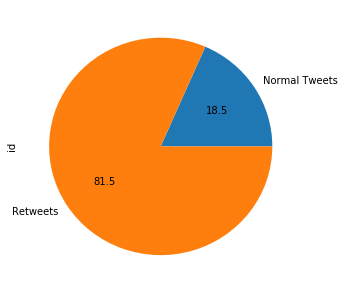

In [56]:
count.plot.pie(labels=["Normal Tweets", "Retweets"], figsize=(5,5), autopct='%.1f')

## Gender distribution

In [57]:
df[["user_name", "user_gender"]].head(10)

,user_name,user_gender
0,TIME,unknown
1,Eric Holder,male
2,Adam Schiff,male
3,Jarin,unknown
4,SharonBohn 🌊,unknown
5,Idella Sherrod,female
6,Bill Feltham,male
7,Deplorable Lessa,unknown
8,kaz #KeepFamiliesTogether,unknown
9,Yasmin Mitri,female


In [58]:
count = df.groupby("user_gender").user_id.count()

In [59]:
count

user_gender
andy        14
female     309
male       258
unknown    519
Name: user_id, dtype: int64

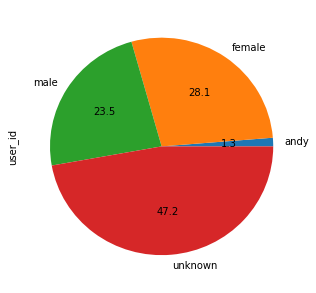

In [60]:
count.plot.pie(figsize=(5,5), autopct='%.1f')

## Sentiment distribution

In [61]:
from IPython.display import Image
Image(url="http://www.datavizcatalogue.com/methods/images/anatomy/box_plot.png")

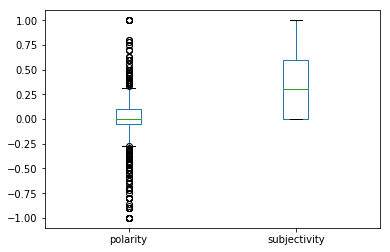

In [62]:
df[["polarity", "subjectivity"]].plot.box()

## Retrieve tweets from a user's timeline

In [63]:
###################################################################################
# Retrieve recent tweets from President Trump's timeline on Twitter.  
###################################################################################

kwargs = {"screen_name": "realDonaldTrump", "count": 200, "include_rts": "true", "since_id": 1}
statuses = twitter_api.statuses.user_timeline(**kwargs)

Refer to President Donald Trump's official Twitter account: https://twitter.com/realDonaldTrump. 

Refer to https://developer.twitter.com/en/docs/tweets/timelines/api-reference/get-statuses-user_timeline for more details.

In [64]:
###################################################################################
# Check the number of records in 'statuses'.
###################################################################################

len(statuses)

200

In [65]:
###################################################################################
# Check the first record in 'statuses'.
###################################################################################

statuses[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Fri Jun 22 02:12:34 +0000 2018',
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/xsbuPzXbHj',
    'expanded_url': 'https://twitter.com/realDonaldTrump/status/1009536237881847808/video/1',
    'id': 1009535898302570496,
    'id_str': '1009535898302570496',
    'indices': [84, 107],
    'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/1009535898302570496/pu/img/vGlSJNJ2h4xc4gRp.jpg',
    'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/1009535898302570496/pu/img/vGlSJNJ2h4xc4gRp.jpg',
    'sizes': {'large': {'h': 720, 'resize': 'fit', 'w': 1280},
     'medium': {'h': 675, 'resize': 'fit', 'w': 1200},
     'small': {'h': 383, 'resize': 'fit', 'w': 680},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'source_status_id': 1009536237881847808,
    'source_status_id_str': '1009536237881847808',
    'source_user_id': 25073877,
    'source_user_id_str': '25073877',
    'type': 'ph

## Retrieve more tweets from the user's timeline

In [66]:
#########################################################################
# 'Results' will be used for accumulating all incoming data from Twitter.
# Start by storing the previous data in 'results'.
#########################################################################

results = []
results += statuses

#########################################################################
# Make more iterative user timeline calls
#########################################################################

N = 15          # Maximum number of calls to be made.

i = 1
while (i <= N) and (len(statuses) > 0):
    
    ##########################################
    # Add a new key 'max_id' to kwargs 
    ##########################################
    
    kwargs["max_id"] = min([status["id"] for status in statuses]) - 1
    statuses = twitter_api.statuses.user_timeline(**kwargs)
    
    print("%d tweets retrieved." %len(statuses))
    
    ##########################################################
    # Add the current results to the overall results.
    ##########################################################
    
    results += statuses
    
    i += 1

200 tweets retrieved.
200 tweets retrieved.
200 tweets retrieved.
200 tweets retrieved.
200 tweets retrieved.
200 tweets retrieved.
197 tweets retrieved.
200 tweets retrieved.
200 tweets retrieved.
199 tweets retrieved.
200 tweets retrieved.
200 tweets retrieved.
200 tweets retrieved.
200 tweets retrieved.
199 tweets retrieved.


This can only return up to 3,200 of a user’s most recent Tweets.

In [67]:
#########################################################################
# Check the number of records in 'results'.
#########################################################################

len(results)

3195

## Save the data as a CSV file

In [68]:
with open(file="user_timeline_data.csv", mode="w", encoding="utf8") as fw:
    fw.write("id\t" +
             "created_at\t" +
             "text\t" +
             "is_retweet\t" +
             "retweet_created_at\t" +
             "retweet_count\t" +
             "user_id\n")

    for status in results:
        fw.write(status["id_str"] + "\t")
        fw.write(status["created_at"] + "\t")
        fw.write(cleanse_text(status["text"]) + "\t")
        
        if "retweeted_status" in status:
            fw.write("1\t")
            fw.write(status["retweeted_status"]["created_at"] + "\t")
        else:
            fw.write("0\t")
            fw.write("\t")
        
        fw.write(str(status["retweet_count"]) + "\t")
        fw.write(status["user"]["id_str"])
        fw.write("\n")

## Load the CSV file as a Pandas dataframe

In [69]:
df = pd.read_csv("user_timeline_data.csv", sep="\t", header=0, parse_dates=[1], index_col=False)     

In [70]:
df.shape

(3195, 7)

In [71]:
df.columns

Index(['id', 'created_at', 'text', 'is_retweet', 'retweet_created_at',
       'retweet_count', 'user_id'],
      dtype='object')

In [72]:
df.head()

,id,created_at,text,is_retweet,retweet_created_at,retweet_count,user_id
0,1009982447822532608,2018-06-22 02:12:34,"RT @realDonaldTrump: Don’t worry, the Republicans, and your President, will fix it! https://t.co/xsbuPzXbHj",1,Wed Jun 20 20:39:30 +0000 2018,66866,25073877
1,1009935968164630528,2018-06-21 23:07:53,You cannot pass legislation on immigration whether it be for safety and security or any other reason including “hea… https://t.co/CxdDZUWyDy,0,NaN,18256,25073877
2,1009928980475138048,2018-06-21 22:40:07,We have to maintain strong borders or we will no longer have a country that we can be proud of – and if we show any… https://t.co/sjgqAjFi7m,0,NaN,23257,25073877
3,1009916650622251009,2018-06-21 21:51:07,"“I REALLY DON’T CARE, DO U?” written on the back of Melania’s jacket, refers to the Fake News Media. Melania has le… https://t.co/sxYB9GYcmS",0,NaN,32584,25073877
4,1009900449456115719,2018-06-21 20:46:44,Big Supreme Court win on internet sales tax - about time! Big victory for fairness and for our country. Great victo… https://t.co/wV2cxGtsWA,0,NaN,11423,25073877


In [73]:
df.tail()

,id,created_at,text,is_retweet,retweet_created_at,retweet_count,user_id
3190,857555256003227648,2017-04-27 11:21:20,"...subject to the fact that if we do not reach a fair deal for all, we will then terminate NAFTA. Relationships are good-deal very possible!",0,NaN,9576,25073877
3191,857552956836786177,2017-04-27 11:12:12,I received calls from the President of Mexico and the Prime Minister of Canada asking to renegotiate NAFTA rather than terminate. I agreed..,0,NaN,15154,25073877
3192,857370270776086528,2017-04-26 23:06:16,"Democrats are trying to bail out insurance companies from disastrous #ObamaCare, and Puerto Rico with your tax dollars. Sad!",0,NaN,14654,25073877
3193,857360510534209536,2017-04-26 22:27:29,"A great great honor to welcome &amp; recognize the National Teacher of the Year, as well as the Teacher of the Year fro… https://t.co/pUGl7RDoVX",0,NaN,9140,25073877
3194,857335793261568000,2017-04-26 20:49:16,"Today, I signed an Executive Order on Enforcing Statutory Prohibitions on Federal Control of Education. EO:… https://t.co/YYafFQncbC",0,NaN,8584,25073877


In [74]:
df["tags"] = df.text.apply(lambda x: TextBlob(x).tags)

In [75]:
df[["text", "tags"]].head()

,text,tags
0,"RT @realDonaldTrump: Don’t worry, the Republicans, and your President, will fix it! https://t.co/xsbuPzXbHj","[(RT, NNP), (@, NNP), (realDonaldTrump, NN), (Don, NNP), (’, NNP), (t, NN), (worry, NN), (the, DT), (Republicans, NNPS), (and, CC), (your, PRP$), (President, NNP), (will, MD), (fix, VB), (it, PRP)..."
1,You cannot pass legislation on immigration whether it be for safety and security or any other reason including “hea… https://t.co/CxdDZUWyDy,"[(You, PRP), (can, MD), (not, RB), (pass, VB), (legislation, NN), (on, IN), (immigration, NN), (whether, IN), (it, PRP), (be, VB), (for, IN), (safety, NN), (and, CC), (security, NN), (or, CC), (an..."
2,We have to maintain strong borders or we will no longer have a country that we can be proud of – and if we show any… https://t.co/sjgqAjFi7m,"[(We, PRP), (have, VBP), (to, TO), (maintain, VB), (strong, JJ), (borders, NNS), (or, CC), (we, PRP), (will, MD), (no, RB), (longer, RB), (have, VB), (a, DT), (country, NN), (that, IN), (we, PRP),..."
3,"“I REALLY DON’T CARE, DO U?” written on the back of Melania’s jacket, refers to the Fake News Media. Melania has le… https://t.co/sxYB9GYcmS","[(“, NN), (I, PRP), (REALLY, NNP), (DON, NNP), (’, NNP), (T, NNP), (CARE, NNP), (DO, NNP), (U, NNP), (”, NNP), (written, VBN), (on, IN), (the, DT), (back, NN), (of, IN), (Melania, NNP), (’, NNP), ..."
4,Big Supreme Court win on internet sales tax - about time! Big victory for fairness and for our country. Great victo… https://t.co/wV2cxGtsWA,"[(Big, JJ), (Supreme, NNP), (Court, NNP), (win, VBP), (on, IN), (internet, NN), (sales, NNS), (tax, NN), (about, IN), (time, NN), (Big, JJ), (victory, NN), (for, IN), (fairness, NN), (and, CC), (f..."


## Keyword networks

In our keyword network,
- a node represents a word,
- an edge between two nodes represents the co-occurrences of the two words in tweets,
- a node weight represents the word count,
- and an edge weight represents the co-occurrence count of the two words.

In [26]:
###################################################################################
# Create a graph G. 
###################################################################################

G = nx.Graph()

In [27]:
#############################################################################################
# Define the number of nodes to consider. 
#############################################################################################

num_nodes = 25

In [34]:
###################################################################################
# The 'counter' object will have all the word count information. 
# The 'co_counter' object will have all the co-occurrence count information.
###################################################################################

counter = Counter()
co_counter = dict()

for tags in df.tags:

    word_set = set()
    for item in tags:
        word = item[0].lower()
        
        if word in (global_stopwords + local_stopwords):
            continue
        else:
            word_set.add(word)

    counter.update(word_set)
    
    ###################################################################################
    # Calculate co-occurrence count of two words and save it in 'co_counter' 
    ###################################################################################

    words = list(word_set)
    for word1 in words:
        if word1 not in co_counter:
            co_counter[word1] = dict()
        
        for word2 in words:

            ######################################
            # Skip if the two words are the same.
            ######################################

            if word1 == word2:
                continue
            
            if word2 not in co_counter[word1]:
                co_counter[word1][word2] = 1
            else:
                co_counter[word1][word2] += 1

In [49]:
co_counter

{'podium': {'liar': 1,
  'said': 1,
  '//t.co/lkbvxmfskj': 1,
  'elected': 1,
  'overwhelming': 1,
  'voters.…': 1,
  'pathological': 1,
  'house': 1,
  'white': 1,
  'majority': 1},
 'liar': {'podium': 1,
  'said': 1,
  '//t.co/lkbvxmfskj': 1,
  'elected': 1,
  'overwhelming': 1,
  'voters.…': 1,
  'pathological': 1,
  'house': 1,
  'white': 1,
  'majority': 1,
  'cruz': 1,
  'father': 1,
  'isomco': 1,
  'ted': 1,
  'realdonaldtrump': 1,
  'cmykickasspage': 1,
  'called': 1,
  'wife': 1,
  'insinuated': 1,
  'krassenstein': 1,
  'disparaged': 1,
  'jfk': 1,
  'as…': 1},
 'said': {'podium': 1,
  'liar': 1,
  '//t.co/lkbvxmfskj': 1,
  'elected': 13,
  'overwhelming': 13,
  'voters.…': 1,
  'pathological': 1,
  'house': 1,
  'white': 2,
  'majority': 12,
  'v_actually': 1,
  'hillary': 9,
  '//t.co/83iqt2pzwk': 1,
  'invasion.…': 1,
  'told': 1,
  'supporting': 1,
  "'m": 1,
  'kill': 1,
  'believed': 1,
  'lawrence': 1,
  'going': 3,
  'jews': 1,
  'man': 1,
  'got': 7,
  '63': 9,
  'm

In [35]:
###################################################################################
# Check the top-k popular words in 'counter'. 
###################################################################################

counter.most_common(num_nodes)

[('people', 118),
 ('sanders', 98),
 ('media', 88),
 ('sarah', 76),
 ('cnn', 63),
 ('presssec', 58),
 ('pittsburgh', 57),
 ('press', 52),
 ('jewish', 49),
 ('realdonaldtrump', 45),
 ('attacks', 44),
 ('synagogue', 43),
 ('white', 42),
 ('one', 42),
 ('like', 38),
 ('obama', 38),
 ('says', 35),
 ('t…', 34),
 ('blame', 34),
 ('said', 33),
 ('%', 32),
 ('welcome', 32),
 ('breaking', 31),
 ('enemy', 31),
 ('time', 31)]

In [36]:
########################################################################################
# Check if the co-occurrence of word1 and word2 is the same as that of word2 and word1.
########################################################################################

co_counter["great"]["america"], co_counter["america"]["great"]           

(1, 1)

In [37]:
###################################################################################
# Create a list of nodes and a list of node weights.
# Multiply each node weight by 10 to adjust the node size for better visualization.
###################################################################################

node_list = [item[0] for item in counter.most_common(num_nodes)]
node_weights = [item[1] * 10 for item in counter.most_common(num_nodes)]

In [38]:
###################################################################################
# Add each node to 'G' with the feature 'weight' being the word count. 
###################################################################################

for word in node_list:
    G.add_node(word, weight=counter.get(word))

In [39]:
###################################################################################
# Check what's in 'G' as nodes. 
###################################################################################

G.nodes.data()

NodeDataView({'people': {'weight': 118}, 'sanders': {'weight': 98}, 'media': {'weight': 88}, 'sarah': {'weight': 76}, 'cnn': {'weight': 63}, 'presssec': {'weight': 58}, 'pittsburgh': {'weight': 57}, 'press': {'weight': 52}, 'jewish': {'weight': 49}, 'realdonaldtrump': {'weight': 45}, 'attacks': {'weight': 44}, 'synagogue': {'weight': 43}, 'white': {'weight': 42}, 'one': {'weight': 42}, 'like': {'weight': 38}, 'obama': {'weight': 38}, 'says': {'weight': 35}, 't…': {'weight': 34}, 'blame': {'weight': 34}, 'said': {'weight': 33}, '%': {'weight': 32}, 'welcome': {'weight': 32}, 'breaking': {'weight': 31}, 'enemy': {'weight': 31}, 'time': {'weight': 31}})

In [40]:
###########################################################################################
# Add each edge between nodes with the feature 'weight' being the co-occurrence count.
###########################################################################################

for word1 in node_list:
    for word2 in node_list:
        if (word1 != word2) & (word2 in co_counter[word1]):
            G.add_edge(word1, word2, weight=co_counter[word1][word2])

In [41]:
###################################################################################
# Check what's in G as edges. 
###################################################################################

G.edges.data()

EdgeDataView([('people', 'sanders', {'weight': 25}), ('people', 'media', {'weight': 15}), ('people', 'sarah', {'weight': 17}), ('people', 'cnn', {'weight': 21}), ('people', 'presssec', {'weight': 10}), ('people', 'pittsburgh', {'weight': 3}), ('people', 'press', {'weight': 23}), ('people', 'jewish', {'weight': 2}), ('people', 'attacks', {'weight': 11}), ('people', 'synagogue', {'weight': 5}), ('people', 'white', {'weight': 1}), ('people', 'one', {'weight': 5}), ('people', 'like', {'weight': 6}), ('people', 'obama', {'weight': 2}), ('people', 'says', {'weight': 5}), ('people', 't…', {'weight': 1}), ('people', 'blame', {'weight': 1}), ('people', 'said', {'weight': 4}), ('people', 'welcome', {'weight': 2}), ('people', 'breaking', {'weight': 2}), ('people', 'enemy', {'weight': 20}), ('people', 'time', {'weight': 2}), ('sanders', 'media', {'weight': 8}), ('sanders', 'sarah', {'weight': 67}), ('sanders', 'cnn', {'weight': 4}), ('sanders', 'presssec', {'weight': 8}), ('sanders', 'pittsburgh',

In [42]:
###################################################################################
# Get a list of edges and a list of edge weights to be displayed. 
###################################################################################

edge_list = nx.get_edge_attributes(G, "weight").keys()
edge_weights = nx.get_edge_attributes(G, "weight").values()

In [43]:
###################################################################################
# Divide each edge weight by 10 to adjust the edge thickness for better visualization. 
###################################################################################

edge_weights = [item / 10 for item in edge_weights]

/Users/daesikkim/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


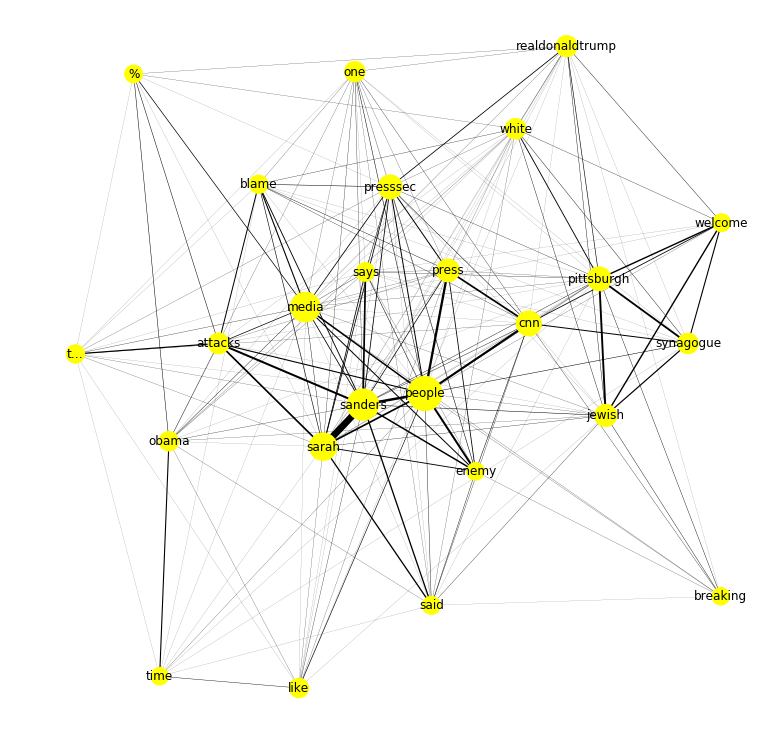

In [44]:
###################################################################################
# Draw the graph G.
###################################################################################

plt.figure(figsize=(10, 10))
nx.draw_spring(G, nodelist=node_list, node_size=node_weights, edgelist=edge_list, width=edge_weights,
                 node_color="yellow", with_labels=True)
plt.draw()

Types of drawing
- draw_circular: draw the graph with a circular layout.
- draw_random  : draw the graph with a random layout.
- draw_spectral: draw the graph with a spectral layout.
- draw_spring  : draw the graph with a spring layout.
- draw_shell   : draw the graph with a shell layout.

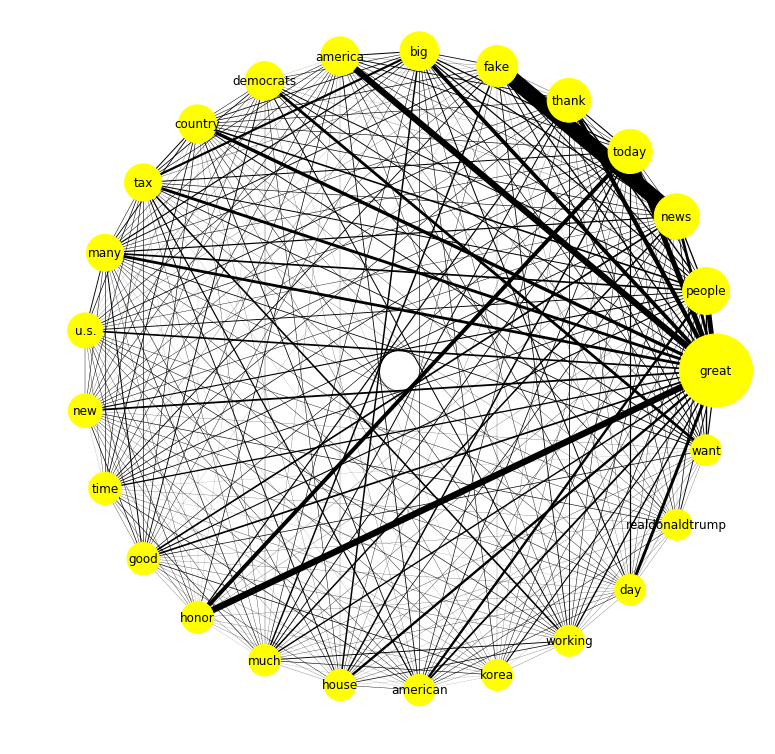

In [89]:
plt.figure(figsize=(10, 10))
nx.draw_circular(G, nodelist=node_list, node_size=node_weights, edgelist=edge_list, width=edge_weights,
                 node_color="yellow", with_labels=True)
plt.draw()

## Interactive visualization of keyword networks

In [90]:
def draw_network(period, layout):
    ###################################################################################
    # Filtering by period.
    ###################################################################################
    
    if period == "2Q 2018":
        df_tmp = df[(df.created_at >= "2018-04-01") & (df.created_at < "2018-07-01")]
    elif period == "1Q 2018":
        df_tmp = df[(df.created_at >= "2018-01-01") & (df.created_at < "2018-04-01")]
    elif period == "4Q 2017":
        df_tmp = df[(df.created_at >= "2017-10-01") & (df.created_at < "2018-01-01")]
    elif period == "3Q 2017":
        df_tmp = df[(df.created_at >= "2017-07-01") & (df.created_at < "2017-10-01")]
    elif period == "2Q 2017":
        df_tmp = df[(df.created_at >= "2017-04-01") & (df.created_at < "2017-07-01")]
    elif period == "1Q 2017":
        df_tmp = df[(df.created_at >= "2017-01-01") & (df.created_at < "2017-04-01")]
    else:
        df_tmp = df.copy()
    
    ###################################################################################
    # The same code as above.
    ###################################################################################
    
    counter = Counter()
    co_counter = dict()

    for tags in df_tmp.tags:
        word_set = set()
        for item in tags:
            word = item[0].lower()

            if word in (global_stopwords + local_stopwords):
                continue
            else:
                word_set.add(word)
        counter.update(word_set)

        words = list(word_set)
        for i in range(len(words)):
            word1 = words[i]
            if word1 not in co_counter:
                co_counter[word1] = dict()
            for j in range(len(words)):
                if j == i:
                    continue
                word2 = words[j]
                if word2 not in co_counter[word1]:
                    co_counter[word1][word2] = 1
                else:
                    co_counter[word1][word2] += 1

    G = nx.Graph()

    node_list = [item[0] for item in counter.most_common(num_nodes)]
    node_weights = [item[1] * 10 for item in counter.most_common(num_nodes)]

    for word in node_list:
        G.add_node(word, count=counter.get(word))

    for word1 in node_list:
        for word2 in node_list:
            if (word1 != word2) & (word2 in co_counter[word1]):
                G.add_edge(word1, word2, weight=co_counter[word1][word2])

    edge_list = nx.get_edge_attributes(G, "weight").keys()
    edge_weights = nx.get_edge_attributes(G, "weight").values()
    edge_weights = [item/10 for item in edge_weights]

    plt.figure(figsize=(10, 10))
    kwargs = {"nodelist": node_list, "node_size": node_weights, "edgelist": edge_list, "width": edge_weights, 
              "node_color": "yellow", "with_labels": True}
    
    ###################################################################################
    # Select the layout to be used for network visualization.
    ###################################################################################
    
    if layout == "Circular":
        nx.draw_circular(G, **kwargs)
    elif layout == "Random":
        nx.draw_random(G, **kwargs)
    elif layout == "Spring":
        nx.draw_spring(G, **kwargs)
    
    plt.draw()

In [91]:
###################################################################################
# Define a dropdown widget.
###################################################################################
w_d = widgets.Dropdown(
    options = ["All", "2Q 2018", "1Q 2018", "4Q 2017", "3Q 2017", "2Q 2017", "1Q 2017"],
    description = "Period",
    value = "All"
)

###################################################################################
# Define a toggle buttons widget.
###################################################################################
w_t = widgets.ToggleButtons(
    options = ["Circular", "Random", "Spring"],
    description = "Layout",
    value = "Spring"
)

In [92]:
###################################################################################
# Interactive interface for network visualization.
###################################################################################

interactive(draw_network, period=w_d, layout=w_t)

interactive(children=(Dropdown(description='Period', options=('All', '2Q 2018', '1Q 2018', '4Q 2017', '3Q 2017', '2Q 2017', '1Q 2017'), value='All'), ToggleButtons(description='Layout', index=2, options=('Circular', 'Random', 'Spring'), value='Spring'), Output()), _dom_classes=('widget-interact',))

## Exercise #1

Retrieve the tweets from the timeline of former President Barack Obama (@BarackObama). Compare the keyword networks of the two presidents. 

## Exercise #2

You can do the same thing with social network analysis as we did with keyword network analysis. In a social network,
- a node represents a user,
- an edge between two nodes can represent the follow relationship of two users,
- a node weight can represent the user's number of followers,
- and an edge weight can represent the number of mentions between the two users.